# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
from AirControl import actions

import time
from pprint import pprint
import PIL.Image as Image
from collections import deque
import base64
import numpy as np
import matplotlib.cm as cm
from io import BytesIO
from matplotlib.pyplot import  imshow
import matplotlib.pyplot as plt
import torch
import matplotlib.animation as animation
from AirControl import sample_generator

from tqdm import tqdm

sample = sample_generator.samples()
A =  actions.Actions()

%matplotlib inline

Now play the environment and call call method `Action.get_connected` to get connected


In [2]:
# get connected to server
A.get_connected()

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [3]:

def reset():
    output = A.reset(IsOutput=True)
    A.set_audio(EnableAudio=False, IsActive=True)
    A.set_ui(ShowUIElements=True, IsActive= True)
    A.set_camera(ActiveCamera=1, IsActive=True, IsCapture=True, CaptureCamera=1, CaptureType=0,CaptureHeight=540, CaptureWidth=960)
    return output

In [4]:
def output_to_Features(output):
    """
    output2features(output)
    Args:
        ```
        output ([type]): [description]
        >>> ([0.905434847,
        0.00182869844,
        0.000590562,
        0.0,
        0.0,
        0.021583642933333334,
        0.325318575,
        0.0460257],
        True)
        ```
    Returns:
        [type]: flight status
        [bool]: if collided
    """
    MSL = output['MSL']
    Latitude = output['Latitude']
    Longitude = output['Longitude']
    normalizedRPM =  output['CurrentRPM']/output['MaxRPM']
    normalizedPower =  output['CurrentPower']/output['MaxPower']
    normalizedSpeed = output['CurrentSpeed']/150
    pitchAngle = output['PitchAngle']
    bankAngle = output['BankAngle']
    ifCollision = output['IfCollision']
    collisionObject = output['collisionObject']
    Reward = output["Reward"]
    feature_vector = [MSL, Latitude, Longitude, normalizedRPM, normalizedPower, normalizedSpeed, pitchAngle, bankAngle]
    return np.asarray(feature_vector),Reward, ifCollision,collisionObject
    
    

In [5]:
def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        # Using Random policy
        return [sample.get_random_pitch(), sample.get_random_yaw(), sample.get_random_roll(), sample.get_random_stickythrottle()]

## Simple Loop to trigger actions on the plane

🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  
🔁 Reset Triggered , Collided with  


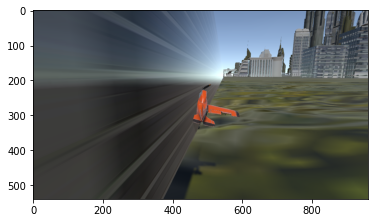

In [6]:
# watch an untrained agent
output = reset()
features,reward, ifCollided,_ = output_to_Features(output)
eps = 1.0
frames = [] # for storing the generated images
fig = plt.figure()
while (True):
        action = act(features, eps)
        pitch =  action[0]
        yaw = action[1]
        roll= action[2]
        stickyThrottle=action[3]
        # print(pitch, yaw, roll, stickyThrottle)
        output = A.step(Pitch=pitch, Yaw=yaw, Roll=roll, StickyThrottle=stickyThrottle)
        features,reward, ifCollided,collisionObject = output_to_Features(output)
        image = output['ScreenCapture']
        if image != "":
            im = Image.open(BytesIO(base64.b64decode(image)))
            imshow(np.asarray(im))
            frames.append(im)
            # Save into a GIF file that loops forever
            frames[0].save('sample.gif', format='GIF',append_images=frames[0:],save_all=True,duration=300, loop=0)
        if ifCollided:
            print("🔁 Reset Triggered , Collided with {0} ".format(collisionObject))
            output = reset()
        if len(frames)>=100:
            break

### Show Created Sequence
![SegmentLocal](sample.gif "segment")